In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
cc_df = pd.read_csv('fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

trans_date_trans_time: 거래 날짜 및 시간

cc_num: 신용카드 번호.

merchant: 대금을 받고 있던 상인.

category: 가게종류

amt: 미국 달러로 표시된 금액입니다.

first: 카드 소지자의 이름입니다.

last: 카드 소지자의 성.

gender: 카드 소유자의 성별입니다. 남성과 여성만 가능합니다!

street:카드 소지자가 거주하는 거리

city:카드 소지자가 거주하는 도시

state:카드 소지자의 거주지 주

zip:카드 소지자의 거주지 우편번호

lat:카드 소지자의 위도

long:카드 소지자의 경도

city_pop:도시 인구

job:카드 소지자의 거래

dob:카드 소지자의 생년월일

trans_num: 거래 ID

unix_time: 1970년부터 현재까지 계산된 시간인 Unix 시간입니다.

merch_lat: 판매자의 위도

merch_long: 판매자의 경도

is_fraud : 해당 거래가 사기인지(1), 아닌지(0)

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


### 중복확인

In [7]:
cc_df[cc_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


중복된 값은 없었다.

시간정보를 datetime으로 변경

In [8]:
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])

cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   cc_num                 491134 non-null  int64         
 2   merchant               491134 non-null  object        
 3   category               491134 non-null  object        
 4   amt                    491134 non-null  float64       
 5   first                  491134 non-null  object        
 6   last                   491134 non-null  object        
 7   gender                 491134 non-null  object        
 8   street                 491134 non-null  object        
 9   city                   491134 non-null  object        
 10  state                  491134 non-null  object        
 11  zip                    491134 non-null  int64         
 12  lat                    491134 non-null  floa

In [9]:
cc_df[cc_df['is_fraud'] == 1]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,fraud_Murray-Smitham,grocery_pos,358.24,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,8a5d80eb4f573480db90899dd8b1c34a,1387592501,47.526202,-113.643313,1
477847,2020-12-21 02:36:03,4716561796955522,fraud_Schmidt and Sons,shopping_net,859.12,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,fe8464ee336fe08b2adacdd0867b1343,1387593363,48.272348,-112.328075,1
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,home,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1
479305,2020-12-21 22:42:11,4716561796955522,fraud_Schulist Ltd,food_dining,123.58,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,daabc7ccf6ccf2c85c1f6186ca11193a,1387665731,48.913048,-113.214921,1


In [10]:
cc_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

생년월일과 거래날짜가 있으니 나이를 구해보자 어느 나이대가 사기를 많이 당했는지 확인 가능해보임

In [11]:
cc_df['dob'] = pd.to_datetime(cc_df['dob'])

In [12]:
(cc_df['trans_date_trans_time'] - cc_df['dob']).astype('<m8[Y]')

0         40.0
1         38.0
2         44.0
3         47.0
4         41.0
          ... 
491129    37.0
491130    36.0
491131    21.0
491132    39.0
491133    27.0
Length: 491134, dtype: float64

In [13]:
cc_df['age'] = (cc_df['trans_date_trans_time'] - cc_df['dob']).astype('<m8[Y]')

In [14]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47.0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,37.0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,36.0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21.0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39.0


In [15]:
cc_df[cc_df['is_fraud'] == 1]['gender'].value_counts()

F    848
M    396
Name: gender, dtype: int64

나이대별 및 성별에 따른 사기여부 시각화

In [16]:
cc_df['age'].value_counts()

35.0    28223
34.0    24293
44.0    24224
47.0    23110
43.0    22966
48.0    21015
42.0    19767
31.0    17835
22.0    17653
45.0    16999
21.0    16920
46.0    16660
23.0    15801
30.0    15691
41.0    15053
32.0    14920
29.0    14576
36.0    14567
20.0    14062
24.0    12972
38.0    12538
33.0    12264
37.0    11704
28.0    10744
49.0     9668
26.0     9455
39.0     9307
40.0     9000
25.0     8830
27.0     8766
19.0     7478
15.0     4435
16.0     3485
14.0     2323
50.0     1514
17.0     1437
18.0      879
Name: age, dtype: int64

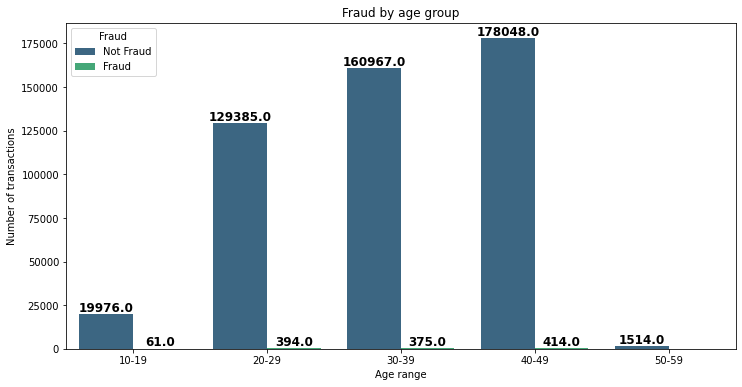

In [17]:
cc_df['by_age'] = pd.cut(cc_df['age'], bins=[10, 20, 30, 40, 50, 60], labels=['10-19', '20-29', '30-39', '40-49', '50-59'], right=False)

plt.figure(figsize=(12, 6))

ax = sns.countplot(x='by_age', hue='is_fraud', data=cc_df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
plt.title('Fraud by age group')
plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
plt.xlabel('Age range')
plt.ylabel('Number of transactions')
plt.show()

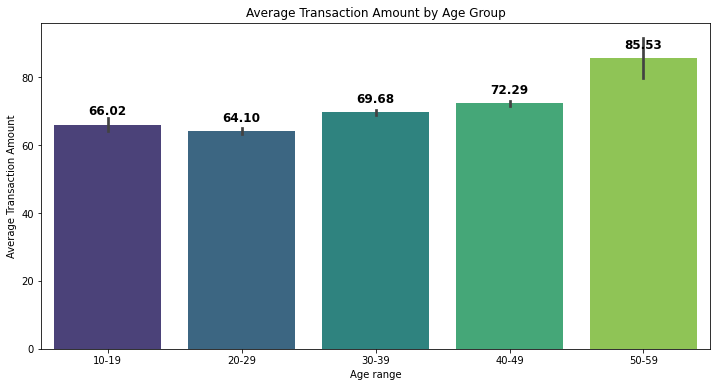

In [18]:
# 나이대별 평균 거래금액

plt.figure(figsize=(12, 6))

ax = sns.barplot(x='by_age', y='amt', data=cc_df, palette='viridis', estimator=np.mean)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age range')
plt.ylabel('Average Transaction Amount')
plt.show()


사기건수가 적다는것을 확인

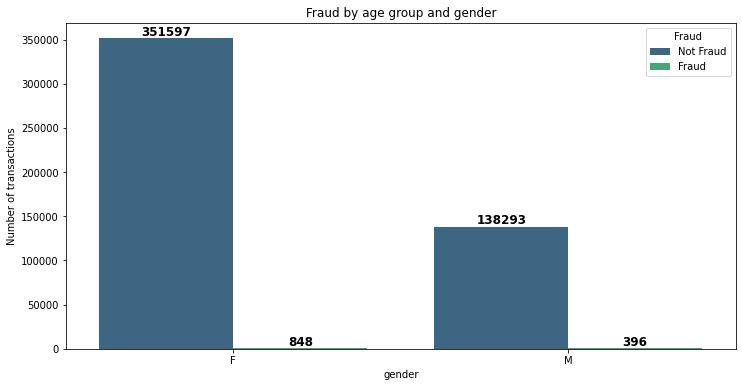

In [19]:
# 시각화
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='gender', hue='is_fraud', data=cc_df, palette='viridis', hue_order=[0, 1])

# 데이터 레이블 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# 범례 및 제목 설정
plt.title('Fraud by age group and gender')
plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
plt.ylabel('Number of transactions')
plt.show()

In [20]:
cc_df['job'].value_counts()

Environmental consultant    8777
Comptroller                 8766
Immunologist                8760
Water engineer              8740
Film/video editor           8035
                            ... 
Energy engineer             3642
Intelligence analyst        3641
Toxicologist                3638
Herbalist                   3638
Physiotherapist             3638
Name: job, Length: 110, dtype: int64

In [21]:
cc_df['merchant'].value_counts()

fraud_Kilback LLC                      1602
fraud_Cormier LLC                      1455
fraud_Kuhn LLC                         1446
fraud_Schumm PLC                       1392
fraud_Boyer PLC                        1375
                                       ... 
fraud_Little-Gleichner                  228
fraud_Douglas, DuBuque and McKenzie     228
fraud_Satterfield-Lowe                  227
fraud_Reichert-Weissnat                 226
fraud_Jerde-Hermann                     226
Name: merchant, Length: 693, dtype: int64

## category

In [22]:
cc_df['category'].value_counts()

shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: category, dtype: int64

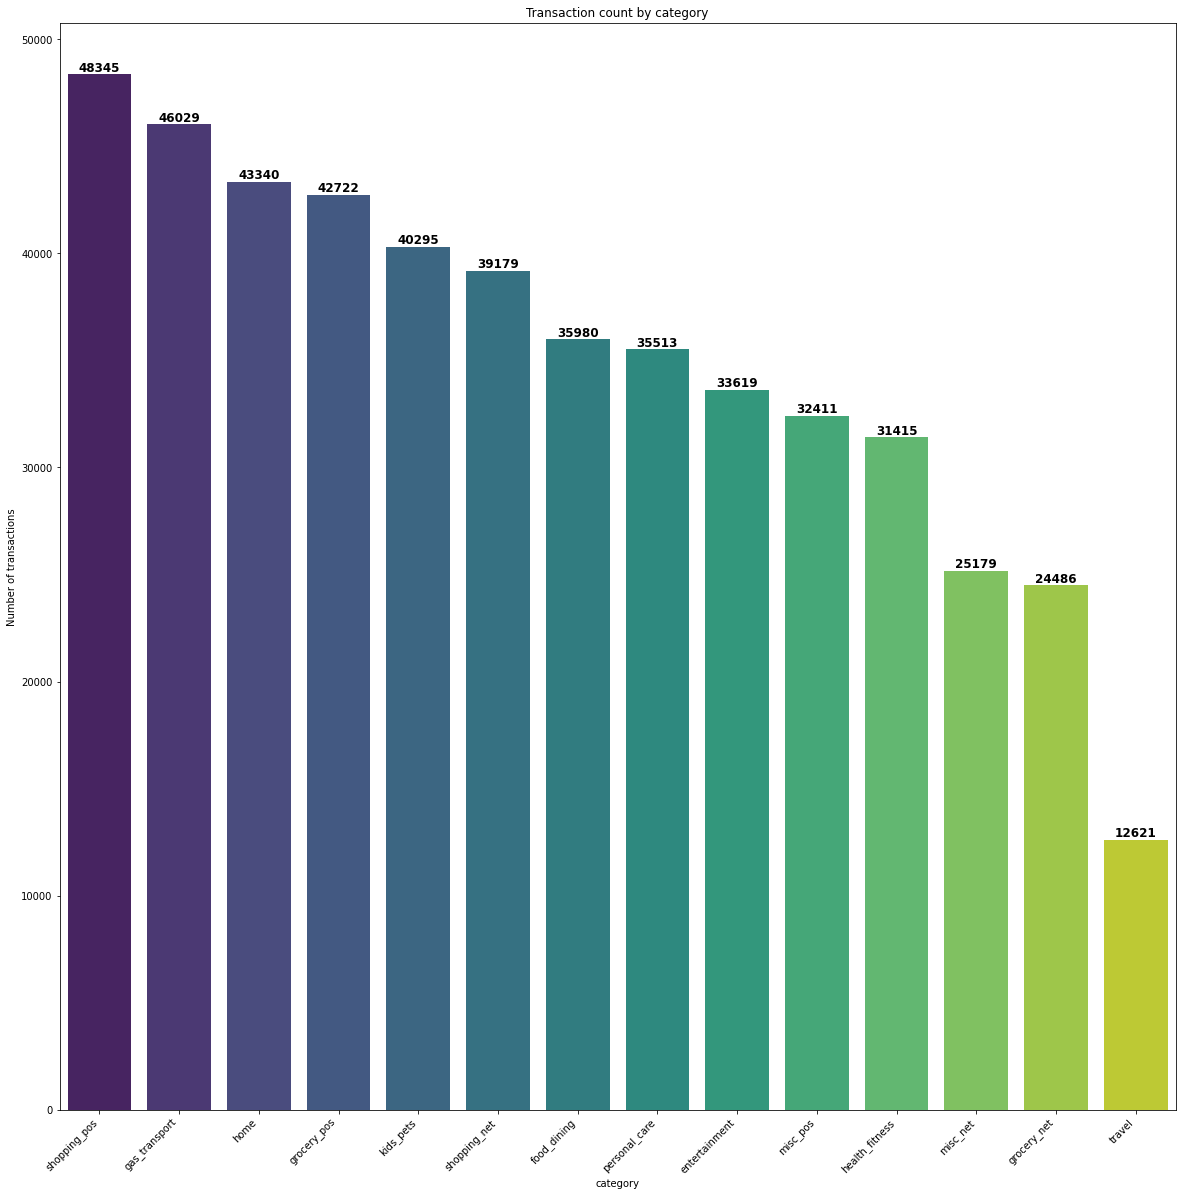

In [23]:
plt.figure(figsize=(20, 20))
sns.barplot(x=cc_df['category'].value_counts().index, y=cc_df['category'].value_counts(), palette='viridis')


for idx, value in enumerate(cc_df['category'].value_counts()):
    plt.text(idx, value + 0.1, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.title('Transaction count by category')
plt.xlabel('category')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.show()

In [24]:
cc_df[(cc_df['category'] == 'home') & (cc_df['is_fraud'] == 1)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age
5649,2019-01-13 23:39:20,180031190491743,"fraud_Durgan, Gislason and Spencer",home,224.94,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,947e68521c0487c2e9ad53bdcdb1941a,1326497960,30.344517,-88.770517,1,47.0,40-49
6284,2019-01-14 22:56:50,180031190491743,fraud_Altenwerth-Kilback,home,249.87,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,1e09d83e4517dff629af8727408d1975,1326581810,30.727198,-88.499148,1,47.0,40-49
7539,2019-01-17 22:26:02,4642255475285942,fraud_Kutch-Wilderman,home,187.35,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,UT,84540,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,4f7bdd079103fb386ebe90b1fd22fd7b,1326839162,39.422070,-109.555496,1,31.0,30-39
13568,2019-01-30 22:22:44,3575789281659026,"fraud_Schiller, Blanda and Johnson",home,241.08,Lindsay,Wilson,F,7618 Gonzales Mission,Centerview,MO,64019,38.7897,-93.8702,2368,Electronics engineer,1989-07-17,18489423f878faa671128bf867da5eb6,1327962164,38.291139,-93.380603,1,29.0,20-29
18946,2019-02-11 22:04:31,6011109736646996,"fraud_O'Connell, Botsford and Hand",home,259.17,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,d0fe9cd05482ab29b8703d7794c5b90b,1328997871,34.200645,-78.746466,1,36.0,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466027,2020-12-11 13:32:43,3596217206093829,"fraud_Crist, Jakubowski and Littel",home,216.01,Sara,Ramirez,F,23843 Scott Island,Birmingham,IA,52535,40.8626,-91.9534,888,Camera operator,1988-03-25,99ad029e9d661ad14dfbf2bc5ca1cf1e,1386768763,40.517061,-92.793208,1,32.0,30-39
467002,2020-12-12 12:25:18,3596217206093829,fraud_Kutch-Ferry,home,234.54,Sara,Ramirez,F,23843 Scott Island,Birmingham,IA,52535,40.8626,-91.9534,888,Camera operator,1988-03-25,bfeedcce13c9e0649ac05940c64387a0,1386851118,40.438814,-91.177613,1,32.0,30-39
477704,2020-12-20 23:39:40,4716561796955522,fraud_Renner Ltd,home,168.06,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,e90fd1b484aeaadc987ef461de9ffaad,1387582780,48.548617,-113.546774,1,48.0,40-49
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,home,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1,48.0,40-49


In [25]:
cc_df[cc_df['category'] == 'home']

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age
173,2019-01-01 12:20:52,630424987505,fraud_Pollich LLC,home,50.76,Jennifer,Black,F,2870 Bean Terrace Apt. 756,Thomas,WV,26292,39.1505,-79.5030,836,Forensic psychologist,1981-08-29,9dbd3e453520b220e7212a665e1f7445,1325420452,38.412664,-79.018129,0,37.0,30-39
176,2019-01-01 12:28:03,3551217896304745,"fraud_O'Connell, Botsford and Hand",home,126.15,Sara,Harris,F,597 Jenny Ford Apt. 543,Tupper Lake,NY,12986,44.2320,-74.4905,6120,Chartered loss adjuster,1976-10-09,5a1fd9fc525d50c1512dba3b8fb57957,1325420883,44.513683,-74.923788,0,42.0,40-49
178,2019-01-01 12:28:41,4452366298769043,fraud_Champlin and Sons,home,19.12,Linda,Davis,F,6602 Ortiz Pine Apt. 179,Blooming Grove,TX,76626,32.0758,-96.7010,1563,Financial adviser,1978-03-04,740ba21b3f6dac605752b84ef73f56e4,1325420921,32.556114,-96.608229,0,40.0,40-49
181,2019-01-01 12:32:02,3502088871723054,fraud_Gerhold LLC,home,104.92,Scott,Martin,M,31472 Cody Place Suite 740,Kensington,MD,20895,39.0298,-77.0793,19054,Operations geologist,1976-09-08,658d63401a38e32c7fc20ba44ce9cea0,1325421122,39.529375,-77.560792,0,42.0,40-49
182,2019-01-01 12:32:55,30551643947183,fraud_Renner Ltd,home,151.34,Morgan,Smith,F,1441 Bradley Place,Grover,NC,28073,35.1836,-81.4552,5621,Toxicologist,1973-11-14,271dcd4b999af1960c0e05ce93023375,1325421175,34.662994,-81.083259,0,45.0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491092,2020-12-31 23:09:36,3575789281659026,"fraud_Bahringer, Bergnaum and Quitzon",home,83.00,Lindsay,Wilson,F,7618 Gonzales Mission,Centerview,MO,64019,38.7897,-93.8702,2368,Electronics engineer,1989-07-17,b7a5b073695e65768766f4ea16694690,1388531376,38.319579,-93.799883,0,31.0,30-39
491095,2020-12-31 23:11:13,3575789281659026,"fraud_Crist, Jakubowski and Littel",home,140.82,Lindsay,Wilson,F,7618 Gonzales Mission,Centerview,MO,64019,38.7897,-93.8702,2368,Electronics engineer,1989-07-17,67814ae01a7b8f2908fdda0ec6a2223c,1388531473,37.902883,-93.579282,0,31.0,30-39
491101,2020-12-31 23:17:42,630423337322,fraud_White and Sons,home,6.49,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,698732c2dfac4de0792d05130558bb5d,1388531862,48.292565,-117.388332,0,42.0,40-49
491125,2020-12-31 23:47:11,6011724471098086,fraud_Altenwerth-Kilback,home,47.05,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1fa626c083dfb1b3296fec4c5877f5cb,1388533631,45.716706,-119.886246,0,39.0,30-39


In [26]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.0,40-49
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.0,30-39
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.0,40-49
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47.0,40-49
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41.0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,37.0,30-39
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,36.0,30-39
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21.0,20-29
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39.0,30-39


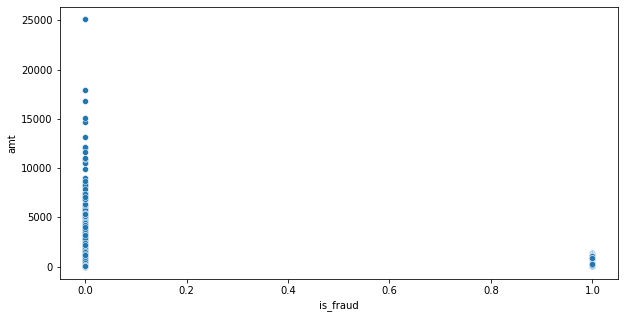

In [27]:
# cc_df['amt'].value_counts()

plt.figure(figsize=(10,5))
sns.scatterplot(x='is_fraud', y='amt', data=cc_df, palette='viridis')
# plt.xlim(0, 10)
plt.show()

10000불 이상 데이터가 적어서 버려도 크게 지장이 없어보임

In [28]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.0,40-49
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.0,30-39
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.0,40-49
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47.0,40-49
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41.0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,37.0,30-39
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,36.0,30-39
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21.0,20-29
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39.0,30-39


In [29]:
cc_df = cc_df[~(cc_df['amt']>=10000)]

In [30]:
cc_df.groupby('cc_num')['amt'].count().reset_index()

,cc_num,amt
0,503874407318,3655
1,567868110212,3644
2,571365235126,4374
3,581686439828,3653
4,630423337322,4362
...,...,...
119,4792627764422477317,4357
120,4797297220948468262,3652
121,4861310130652566408,3643
122,4906628655840914250,3655


시간대별로 나눠보자

In [31]:
# 시간대 추출
cc_df['hour'] = cc_df['trans_date_trans_time'].dt.hour

In [32]:
def get_time_of_day(hour):
    if 4 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [33]:
cc_df['time_of_day'] = cc_df['hour'].apply(get_time_of_day)

In [34]:
# 칼럼삭제
cc_df = cc_df.drop(['hour'], axis = 1)

In [35]:
cc_df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age,time_of_day
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,37.0,30-39,Night
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,36.0,30-39,Night
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21.0,20-29,Night
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39.0,30-39,Night
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0,27.0,20-29,Night


저녁에 결제 금액이 크다는것을 확인

In [36]:
cc_df.groupby('time_of_day')['amt'].sum().reset_index()

,time_of_day,amt
0,Afternoon,9023703.52
1,Evening,7207678.51
2,Morning,7731767.84
3,Night,9757571.22


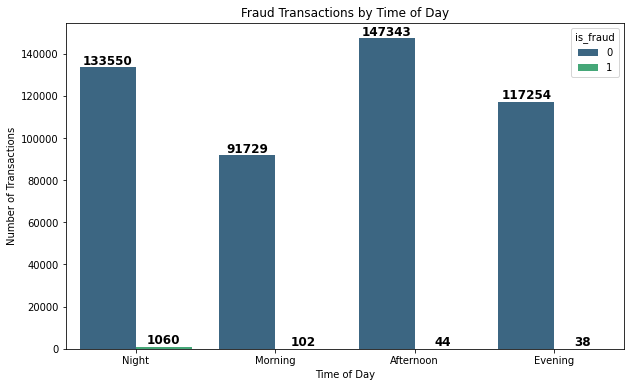

In [37]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='time_of_day', hue='is_fraud', data=cc_df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
    
plt.title('Fraud Transactions by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Transactions')
plt.show()


night 22시 이후시간대에 사기건수가 많다

In [38]:
cc_df['first'] + ' ' + cc_df['last']

0           Stephanie Gill
1         Kenneth Robinson
2                Mary Wall
3           Daniel Escobar
4             Jenna Brooks
                ...       
491129    Rebecca Erickson
491130          Ana Howell
491131        Jose Vasquez
491132          Ann Lawson
491133         Samuel Frey
Length: 491120, dtype: object

In [39]:
cc_df['name'] = cc_df['first'] + ' ' + cc_df['last']
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age,time_of_day,name
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.0,40-49,Night,Stephanie Gill
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.0,30-39,Night,Kenneth Robinson
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.0,40-49,Night,Mary Wall
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47.0,40-49,Night,Daniel Escobar
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41.0,40-49,Night,Jenna Brooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,37.0,30-39,Night,Rebecca Erickson
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,36.0,30-39,Night,Ana Howell
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21.0,20-29,Night,Jose Vasquez
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39.0,30-39,Night,Ann Lawson


In [40]:
cc_df.groupby('name')['is_fraud'].sum().reset_index().sort_values(by='is_fraud', ascending=False)

,name,is_fraud
40,Gina Grimes,18
53,Jodi Rodriguez,16
55,Jose Vasquez,16
35,Dorothy Thomas,16
31,Dawn Gray,16
...,...,...
94,Rebecca Erickson,2
38,Erin Chavez,2
51,Jessica Ward,2
114,Tammy Ayers,0


In [41]:
cc_df.groupby('name')['amt'].sum().reset_index().sort_values(by='amt', ascending=False)


,name,amt
114,Tammy Ayers,406394.34
113,Susan Hardy,404503.72
1,Allison Allen,400889.15
70,Lauren Torres,397869.00
47,Jenna Brooks,396746.42
...,...,...
57,Juan Sherman,183800.84
88,Monica Tucker,183013.51
54,John Stevens,182031.65
96,Robert Haynes,174778.56


어떤 고객이 사기를 많이 당했고, 어떤 고객이 많이 소비한지 알 수 있었다

## 불필요한 컬럼 제거

In [42]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,by_age,time_of_day,name
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.0,40-49,Night,Stephanie Gill
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.0,30-39,Night,Kenneth Robinson
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.0,40-49,Night,Mary Wall
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47.0,40-49,Night,Daniel Escobar
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41.0,40-49,Night,Jenna Brooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,37.0,30-39,Night,Rebecca Erickson
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,36.0,30-39,Night,Ana Howell
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,21.0,20-29,Night,Jose Vasquez
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,39.0,30-39,Night,Ann Lawson


cc_num, first,last, street, merchant,zip, lat, long, city_pop, dob,trans_num, unix_time	merch_lat, merch_long,  불필요한 컬럼들은 삭제, 날짜시간은 time_of_day로 대체, age는 By_age로 대체해보자

In [43]:
pd.Series(cc_df.columns)

0     trans_date_trans_time
1                    cc_num
2                  merchant
3                  category
4                       amt
5                     first
6                      last
7                    gender
8                    street
9                      city
10                    state
11                      zip
12                      lat
13                     long
14                 city_pop
15                      job
16                      dob
17                trans_num
18                unix_time
19                merch_lat
20               merch_long
21                 is_fraud
22                      age
23                   by_age
24              time_of_day
25                     name
dtype: object

In [44]:
drop_col = list(cc_df.columns[[0,1,2,5,6,8,11,12,13,14,16,17,18,19,20,22,25]])

In [45]:
drop_col

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'first',
 'last',
 'street',
 'zip',
 'lat',
 'long',
 'city_pop',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'age',
 'name']

In [46]:
new_cc_df = cc_df.drop(drop_col, axis=1)
new_cc_df

,category,amt,gender,city,state,job,is_fraud,by_age,time_of_day
0,grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,0,40-49,Night
1,grocery_pos,44.71,M,Elizabeth,NJ,Operational researcher,0,30-39,Night
2,grocery_net,46.28,F,Plainfield,NJ,Leisure centre manager,0,40-49,Night
3,grocery_pos,64.09,M,Romulus,MI,Police officer,0,40-49,Night
4,misc_pos,25.58,F,Baton Rouge,LA,"Designer, furniture",0,40-49,Night
...,...,...,...,...,...,...,...,...,...
491129,home,134.26,F,Wilmington,NC,English as a second language teacher,0,30-39,Night
491130,shopping_pos,25.49,F,Bradley,SC,Research scientist (physical sciences),0,30-39,Night
491131,kids_pets,111.84,M,Lake Jackson,TX,Futures trader,0,20-29,Night
491132,kids_pets,86.88,F,Burbank,WA,Musician,0,30-39,Night


In [47]:
new_cc_df.corr()

,amt,is_fraud
amt,1.000000,0.146015
is_fraud,0.146015,1.000000


## 원핫인코딩

In [48]:
new_cc_df = pd.get_dummies(new_cc_df, drop_first=True)
# new_cc_df

## 스케일링

In [49]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [50]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [51]:
# ss.fit(new_cc_df)

In [52]:
# ss.transform(new_cc_df)

In [53]:
ss.fit_transform(new_cc_df)

array([[ 0.27304379, -0.05039264, -0.28116294, ..., -0.56014219,
        -0.47956887,  1.62741081],
       [-0.16955611, -0.05039264, -0.28116294, ..., -0.56014219,
        -0.47956887,  1.62741081],
       [-0.15844155, -0.05039264, -0.28116294, ..., -0.56014219,
        -0.47956887,  1.62741081],
       ...,
       [ 0.30567952, -0.05039264, -0.28116294, ..., -0.56014219,
        -0.47956887,  1.62741081],
       [ 0.12897936, -0.05039264, -0.28116294, ..., -0.56014219,
        -0.47956887,  1.62741081],
       [-0.21613812, -0.05039264, -0.28116294, ..., -0.56014219,
        -0.47956887,  1.62741081]])

In [54]:
# pd.DataFrame(ss.fit_transform(new_cc_df))

In [55]:
pd.DataFrame(ss.transform(new_cc_df),columns=new_cc_df.columns)

,amt,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,city_Armagh,city_Bagley,city_Baton Rouge,city_Bauxite,city_Bellmore,city_Bessemer,city_Birmingham,city_Blooming Grove,city_Bowdoin,...,job_Statistician,job_Structural engineer,job_Sub,"job_Surveyor, land/geomatics","job_Surveyor, minerals","job_Surveyor, rural practice",job_Systems developer,job_Tax inspector,job_Television production assistant,"job_Therapist, art","job_Therapist, sports",job_Tourism officer,job_Town planner,job_Toxicologist,job_Trade mark attorney,job_Travel agency manager,job_Tree surgeon,job_Water engineer,by_age_20-29,by_age_30-39,by_age_40-49,by_age_50-59,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0.273044,-0.050393,-0.281163,-0.321582,-0.229071,3.239709,-0.261414,-0.311109,-0.298966,-0.232463,-0.265814,-0.279189,-0.294433,-0.330434,-0.162315,-0.627294,-0.086519,-0.086591,-0.094774,-0.094774,-0.086531,-0.086519,-0.128919,-0.086519,-0.094796,...,-0.086471,-0.094861,-0.086627,-0.122937,-0.094927,-0.086448,-0.086459,-0.09485,-0.122612,-0.086531,-0.086495,-0.086519,-0.086591,-0.086388,-0.094828,-0.086603,-0.094905,-0.134605,-0.599280,-0.699447,1.323633,-0.055608,-0.560142,-0.479569,1.627411
1,-0.169556,-0.050393,-0.281163,-0.321582,-0.229071,3.239709,-0.261414,-0.311109,-0.298966,-0.232463,-0.265814,-0.279189,-0.294433,-0.330434,-0.162315,1.594150,-0.086519,-0.086591,-0.094774,-0.094774,-0.086531,-0.086519,-0.128919,-0.086519,-0.094796,...,-0.086471,-0.094861,-0.086627,-0.122937,-0.094927,-0.086448,-0.086459,-0.09485,-0.122612,-0.086531,-0.086495,-0.086519,-0.086591,-0.086388,-0.094828,-0.086603,-0.094905,-0.134605,-0.599280,1.429701,-0.755496,-0.055608,-0.560142,-0.479569,1.627411
2,-0.158442,-0.050393,-0.281163,-0.321582,4.365452,-0.308670,-0.261414,-0.311109,-0.298966,-0.232463,-0.265814,-0.279189,-0.294433,-0.330434,-0.162315,-0.627294,-0.086519,-0.086591,-0.094774,-0.094774,-0.086531,-0.086519,-0.128919,-0.086519,-0.094796,...,-0.086471,-0.094861,-0.086627,-0.122937,-0.094927,-0.086448,-0.086459,-0.09485,-0.122612,-0.086531,-0.086495,-0.086519,-0.086591,-0.086388,-0.094828,-0.086603,-0.094905,-0.134605,-0.599280,-0.699447,1.323633,-0.055608,-0.560142,-0.479569,1.627411
3,-0.032359,-0.050393,-0.281163,-0.321582,-0.229071,3.239709,-0.261414,-0.311109,-0.298966,-0.232463,-0.265814,-0.279189,-0.294433,-0.330434,-0.162315,1.594150,-0.086519,-0.086591,-0.094774,-0.094774,-0.086531,-0.086519,-0.128919,-0.086519,-0.094796,...,-0.086471,-0.094861,-0.086627,-0.122937,-0.094927,-0.086448,-0.086459,-0.09485,-0.122612,-0.086531,-0.086495,-0.086519,-0.086591,-0.086388,-0.094828,-0.086603,-0.094905,-0.134605,-0.599280,-0.699447,1.323633,-0.055608,-0.560142,-0.479569,1.627411
4,-0.304984,-0.050393,-0.281163,-0.321582,-0.229071,-0.308670,-0.261414,-0.311109,-0.298966,-0.232463,3.762031,-0.279189,-0.294433,-0.330434,-0.162315,-0.627294,-0.086519,-0.086591,10.551447,-0.094774,-0.086531,-0.086519,-0.128919,-0.086519,-0.094796,...,-0.086471,-0.094861,-0.086627,-0.122937,-0.094927,-0.086448,-0.086459,-0.09485,-0.122612,-0.086531,-0.086495,-0.086519,-0.086591,-0.086388,-0.094828,-0.086603,-0.094905,-0.134605,-0.599280,-0.699447,1.323633,-0.055608,-0.560142,-0.479569,1.627411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491115,0.464398,-0.050393,-0.281163,-0.321582,-0.229071,-0.308670,-0.261414,3.214311,-0.298966,-0.232463,-0.265814,-0.279189,-0.294433,-0.330434,-0.162315,-0.627294,-0.086519,-0.086591,-0.094774,-0.094774,-0.086531,-0.086519,-0.128919,-0.086519,-0.094796,...,-0.086471,-0.094861,-0.086627,-0.122937,-0.094927,-0.086448,-0.086459,-0.09485,-0.122612,-0.086531,

In [56]:
# ss_df = pd.DataFrame(ss.transform(new_cc_df))
# ss_df

In [57]:
# rs.fit(new_cc_df)

In [58]:
# rs.transform(new_cc_df)

In [59]:
rs.fit_transform(new_cc_df)

array([[ 0.91171525,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.03559417,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.05759529,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.97631726,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62654148,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.05661435,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [60]:
pd.DataFrame(rs.fit_transform(new_cc_df),columns=new_cc_df.columns)

,amt,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,city_Armagh,city_Bagley,city_Baton Rouge,city_Bauxite,city_Bellmore,city_Bessemer,city_Birmingham,city_Blooming Grove,city_Bowdoin,...,job_Statistician,job_Structural engineer,job_Sub,"job_Surveyor, land/geomatics","job_Surveyor, minerals","job_Surveyor, rural practice",job_Systems developer,job_Tax inspector,job_Television production assistant,"job_Therapist, art","job_Therapist, sports",job_Tourism officer,job_Town planner,job_Toxicologist,job_Trade mark attorney,job_Travel agency manager,job_Tree surgeon,job_Water engineer,by_age_20-29,by_age_30-39,by_age_40-49,by_age_50-59,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0.911715,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.035594,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.057595,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.307175,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.232483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491115,1.290499,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
491116,-0.233744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
491117,0.976317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
491118,0.626541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [61]:
# mm.fit(new_cc_df)

In [62]:
# mm.transform(new_cc_df)

In [63]:
mm.fit_transform(new_cc_df)

array([[0.010697  , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00440145, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00455954, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01116121, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00864783, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00373887, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [64]:
pd.DataFrame(mm.fit_transform(new_cc_df),columns=new_cc_df.columns)

,amt,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,city_Armagh,city_Bagley,city_Baton Rouge,city_Bauxite,city_Bellmore,city_Bessemer,city_Birmingham,city_Blooming Grove,city_Bowdoin,...,job_Statistician,job_Structural engineer,job_Sub,"job_Surveyor, land/geomatics","job_Surveyor, minerals","job_Surveyor, rural practice",job_Systems developer,job_Tax inspector,job_Television production assistant,"job_Therapist, art","job_Therapist, sports",job_Tourism officer,job_Town planner,job_Toxicologist,job_Trade mark attorney,job_Travel agency manager,job_Tree surgeon,job_Water engineer,by_age_20-29,by_age_30-39,by_age_40-49,by_age_50-59,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0.010697,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.004401,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.004560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.006353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.002475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491115,0.013419,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
491116,0.002466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
491117,0.011161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
491118,0.008648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
pca = PCA()

In [66]:
pca.fit_transform(new_cc_df)

array([[ 3.85695003e+01, -7.12606823e-01, -4.05499934e-01, ...,
         4.23899049e-15,  2.91694063e-16,  4.19341926e-15],
       [-2.39506703e+01,  7.24394635e-01, -2.76894821e-01, ...,
        -3.21776291e-16, -6.26087069e-16,  9.89881390e-17],
       [-2.23807629e+01, -7.52639219e-01, -3.63127123e-01, ...,
        -1.25634315e-15, -2.72709491e-16, -1.62353927e-15],
       ...,
       [ 4.31789280e+01,  1.35485559e-01,  1.09019676e+00, ...,
        -1.43782166e-17, -1.61779501e-18, -1.32536814e-17],
       [ 1.82191647e+01,  7.10916027e-01, -5.62893541e-01, ...,
         1.06286608e-17,  1.24670079e-18,  1.39089500e-17],
       [-3.05310086e+01,  1.99744124e-01,  1.05932183e+00, ...,
        -2.40540065e-17, -2.72591413e-18, -1.50855302e-17]])

In [67]:
pca = PCA(2)

In [68]:
pd.DataFrame(pca.fit_transform(new_cc_df), columns = ['PC1','PC2'])

,PC1,PC2
0,38.569500,-0.712609
1,-23.950670,0.724392
2,-22.380763,-0.752638
3,-4.570623,-0.699291
4,-43.080696,-0.779551
...,...,...
491115,65.599174,0.713580
491116,-43.170744,0.678000
491117,43.178928,0.135491
491118,18.219165,0.710921


In [69]:
(pca.explained_variance_ratio_).sum()

0.9997611637602406

In [70]:
corr = new_cc_df

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(10,12))
sns.heatmap(corr, mask = mask, annot=True, fmt='.2f')
plt.show()

# 후기

- 경험이 많이 부족하고 실력이 부족하다는걸 또 다시 느낌 데이터 바꼈다고 어떻게 해야할지 모르는 상황이 발생
- 지리에 관련한 데이터를 제거하고 나니 쓸 수 있는게 없어 보임
- 지리 데이터까지 활용하면 더 재밌을 것 같음
- 중간에 가상 커널 메모리가 부족하여 커널이 끊겨서 힘들었음
- PCA 2개 선정한 컬럼이 분산의 99%를 설명 가능하다는 것을 알 수 있었다.
- 나이별, 시간대에 따라 거래량, 금액 들을 알 수 있었다.
- 스케일러에 대해서 더 공부해야겠다.


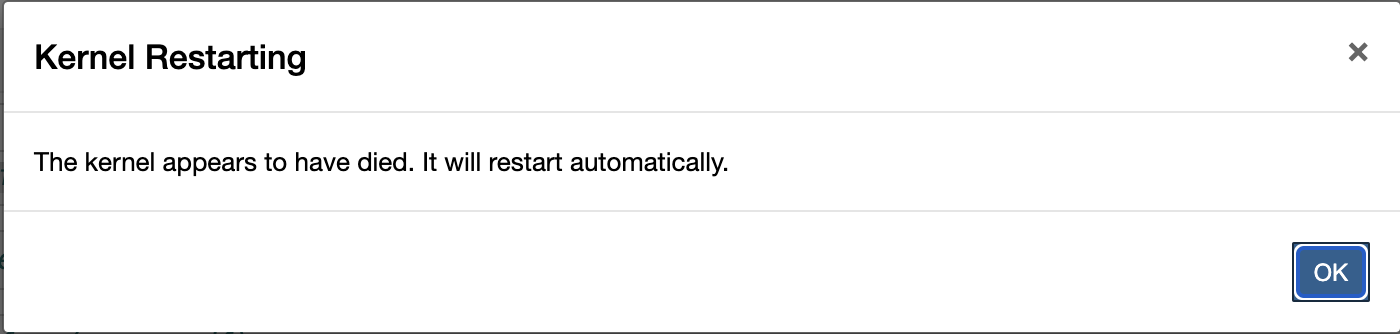

서버에서 스케일링 자체가 불가능이었는데 <br>
로컬에서는 스케일링까지는 가능해졌다 <br>
문제 해결 방안을 못찾겠다. <br>

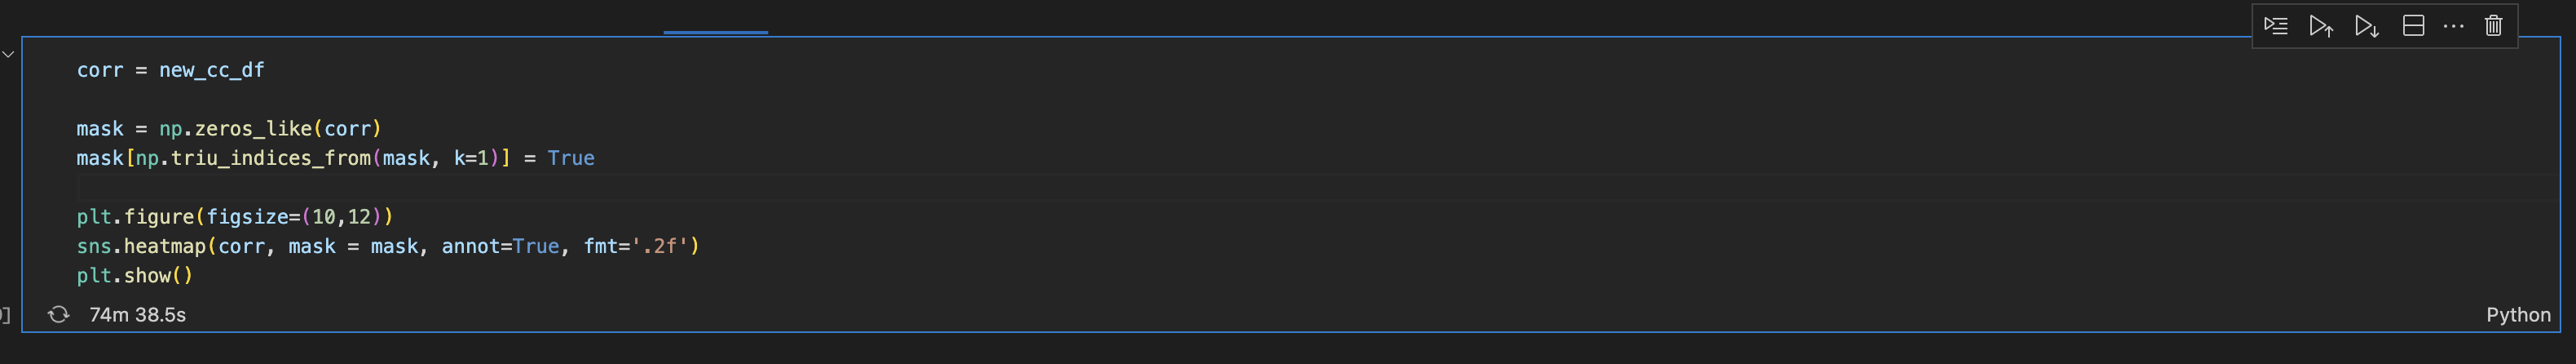

로컬에서 corr 볼려고 했는데<br>
나오지 않았다.
이 문제도 해결하지 못했다.